# Correlation

This notebook shows
* The scatter plot created by pairplot of all the float columns
* the correlation between the columns using the heat map
* the mean demand of power comparision in presence and absence of different conditions and precipitation type


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from statsmodels.tsa import stattools
import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [3]:
# data_path = "../Data/updated_categorical_data.csv"
data_path = "/content/drive/MyDrive/Colab Notebooks/Hitachi/Data/imputed_data.csv"
data_df = pd.read_csv(data_path)
copy_data_df = data_df.copy()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Prices
(EUR/MWh)                27555 non-null  float64
 1   datetime                        27555 non-null  object 
 2   Demand (MW)                     27555 non-null  float64
 3   Temperature                     27555 non-null  float64
 4   feelslike                       27555 non-null  float64
 5   dewpoint                        27555 non-null  float64
 6   humidity                        27555 non-null  float64
 7   precipitation                   27555 non-null  float64
 8   precipprob                      27555 non-null  float64
 9   snow                            27555 non-null  float64
 10  snowdepth                       27555 non-null  float64
 11  windgust                        27555 non-null  float64
 12  windspeed                       

In [4]:
copy_data_df.drop(columns = ["Prices\n(EUR/MWh)"], inplace=True)

In [5]:
copy_data_df.head()

,datetime,Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,...,ice,rain,snow.1,Clear,Freezing Drizzle/Freezing Rain,Ice,Overcast,Partially cloudy,Rain,Snow
0,2020-01-01 00:00:00,445.8,38.0,34.4,29.0,69.76,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2020-01-01 01:00:00,424.5,38.0,34.4,29.9,72.37,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,2020-01-01 02:00:00,423.5,38.0,35.7,30.8,75.06,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,2020-01-01 03:00:00,418.8,37.1,33.4,29.9,74.97,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,2020-01-01 04:00:00,414.8,35.1,32.3,29.0,78.41,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
copy_data_df.isnull().sum()

datetime                          0
Demand (MW)                       0
Temperature                       0
feelslike                         0
dewpoint                          0
humidity                          0
precipitation                     0
precipprob                        0
snow                              0
snowdepth                         0
windgust                          0
windspeed                         0
winddirection                     0
sealevelpressure                  0
cloudcover                        0
visibility                        0
solarradiation                    0
uvindex                           0
severerisk                        0
freezingrain                      0
ice                               0
rain                              0
snow.1                            0
Clear                             0
Freezing Drizzle/Freezing Rain    0
Ice                               0
Overcast                          0
Partially cloudy            

# Correlation



In [24]:
# precipprob value is either 0 or 100 and hence it is removed from the float columns
float_columns = copy_data_df.select_dtypes(include='float').columns.tolist()
float_columns.remove('precipprob')
float_columns

['Demand (MW)',
 'Temperature',
 'feelslike',
 'dewpoint',
 'humidity',
 'precipitation',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddirection',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'uvindex',
 'severerisk']

In [21]:
int_columns = copy_data_df.select_dtypes(include='int').columns.tolist()
int_columns.append('precipprob')
int_columns

['freezingrain',
 'ice',
 'rain',
 'snow.1',
 'Clear',
 'Freezing Drizzle/Freezing Rain',
 'Ice',
 'Overcast',
 'Partially cloudy',
 'Rain',
 'Snow',
 'precipprob']

In [22]:
float_df = copy_data_df[float_columns].copy()

In [23]:
float_df.head()

,Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk
0,445.8,38.0,34.4,29.0,69.76,0.0,0.0,0.0,15.410436,4.7,220.0,1015.4,100.0,9.9,0.0,0.0,13.10842
1,424.5,38.0,34.4,29.9,72.37,0.0,0.0,0.0,15.410436,4.7,230.0,1015.3,100.0,9.9,0.0,0.0,13.10842
2,423.5,38.0,35.7,30.8,75.06,0.0,0.0,0.0,15.410436,3.4,230.0,1015.4,100.0,9.9,0.0,0.0,13.10842
3,418.8,37.1,33.4,29.9,74.97,0.0,0.0,0.0,15.410436,4.7,220.0,1015.3,88.9,9.9,0.0,0.0,13.10842
4,414.8,35.1,32.3,29.0,78.41,0.0,0.0,0.0,15.410436,3.4,240.0,1015.2,0.0,9.9,0.0,0.0,13.10842


In [25]:
sns.pairplot(float_df)

Output hidden; open in https://colab.research.google.com to view.

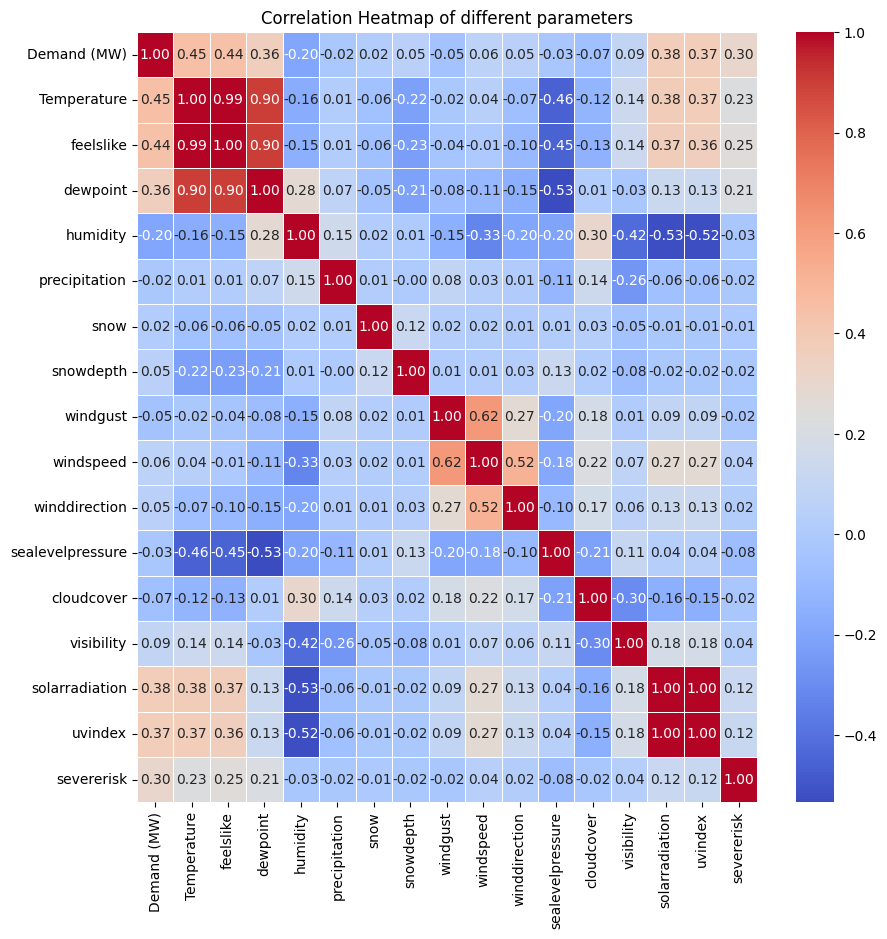

In [29]:
correlation_matrix = float_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of different parameters')
plt.show()

In [30]:
int_df = copy_data_df[int_columns].copy()
int_df["Demand (MW)"] = copy_data_df["Demand (MW)"]
int_df.head()

,freezingrain,ice,rain,snow.1,Clear,Freezing Drizzle/Freezing Rain,Ice,Overcast,Partially cloudy,Rain,Snow,precipprob,Demand (MW)
0,0,0,0,0,0,0,0,1,0,0,0,0.0,445.8
1,0,0,0,0,0,0,0,1,0,0,0,0.0,424.5
2,0,0,0,0,0,0,0,1,0,0,0,0.0,423.5
3,0,0,0,0,0,0,0,0,1,0,0,0.0,418.8
4,0,0,0,0,1,0,0,0,0,0,0,0.0,414.8


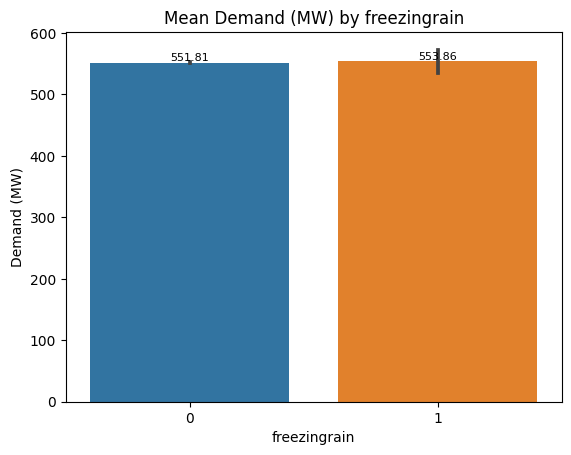

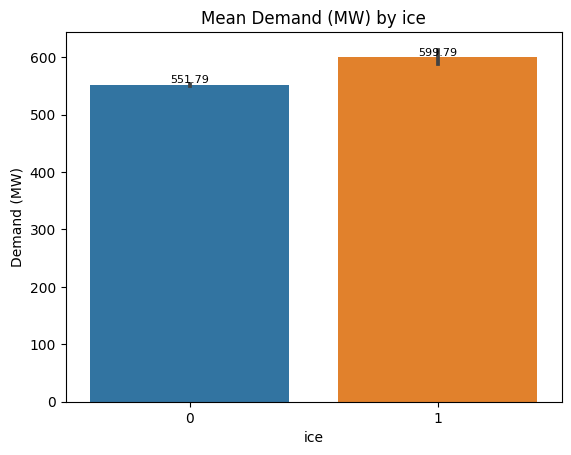

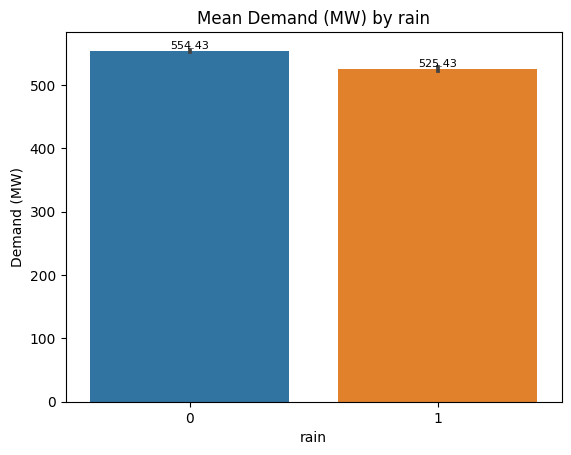

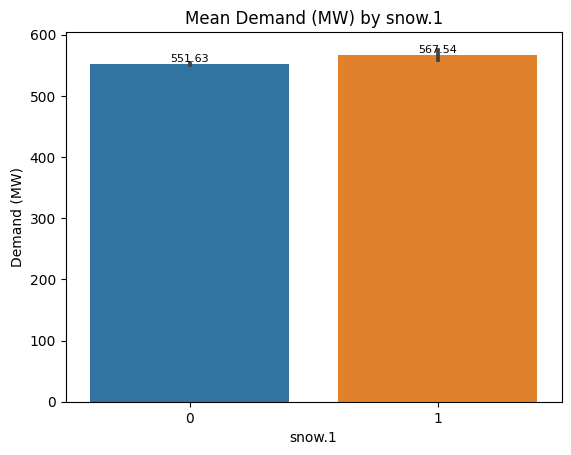

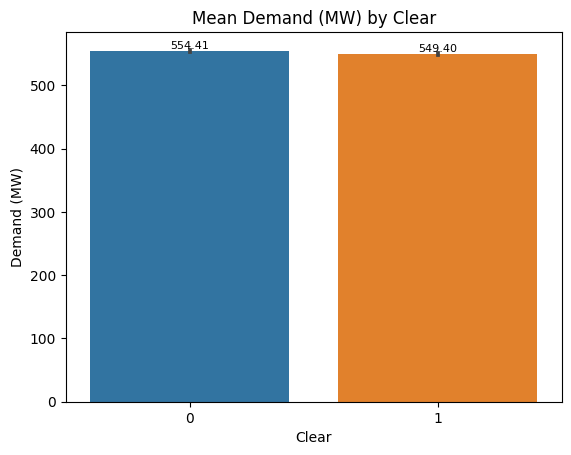

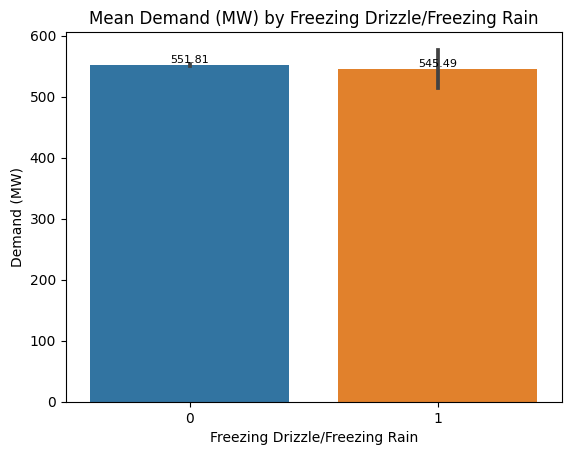

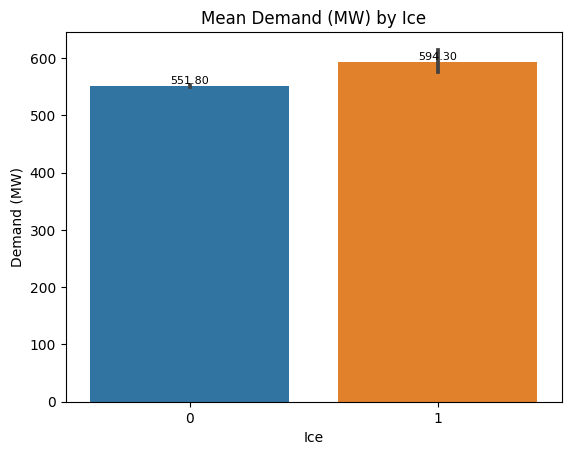

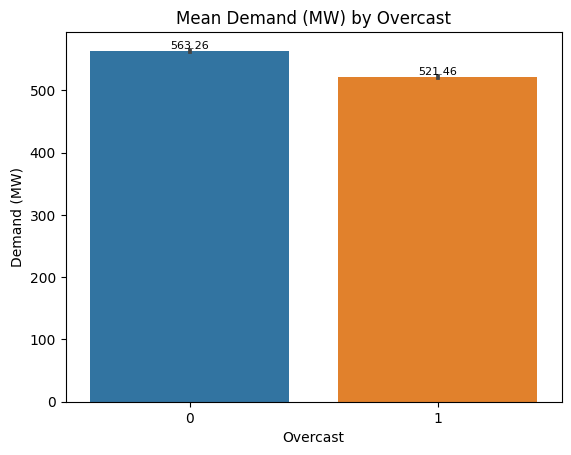

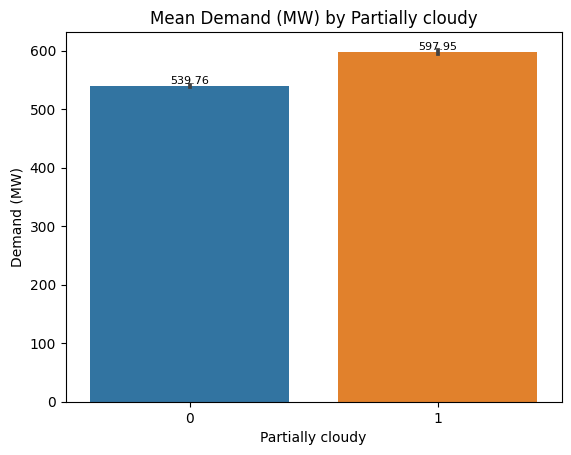

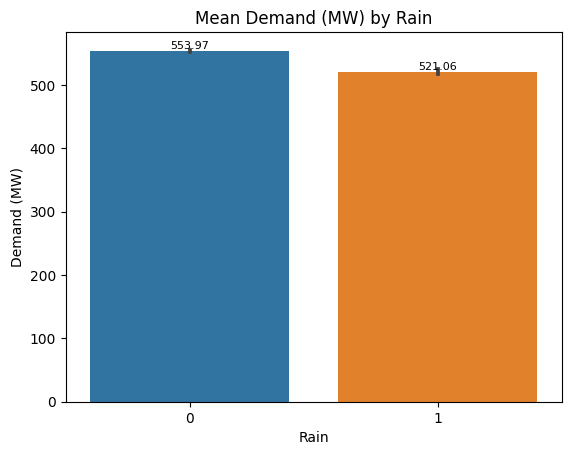

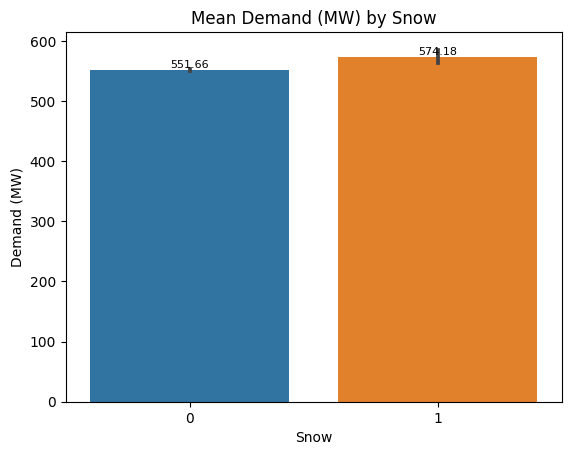

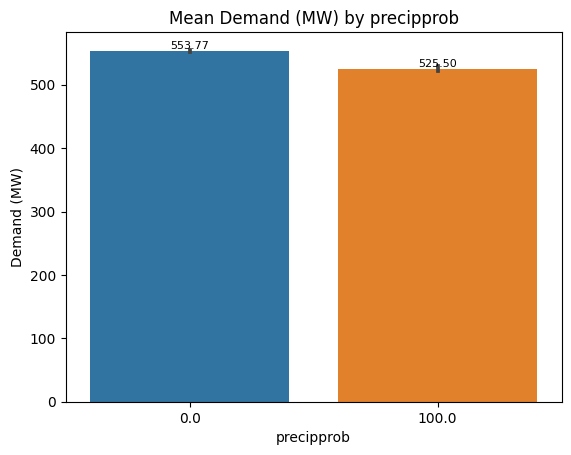

In [36]:
for column in int_columns:
  # Create the bar plot
  ax = sns.barplot(x=column, y='Demand (MW)', data=int_df, estimator=np.mean)

  # Add mean values above each bar
  for container in ax.containers:
      # Iterate over each bar in the container
      for i, bar in enumerate(container):
          height = bar.get_height()

          # Get the mean value for the corresponding category
          mean_value = int_df.groupby(column)['Demand (MW)'].mean().iloc[i]

          # Add text annotation above each bar
          ax.text(bar.get_x() + bar.get_width() / 2, height, f'{mean_value:.2f}',
                  ha='center', va='bottom', fontsize=8, color='black')

  plt.title(f'Mean Demand (MW) by {column}')
  plt.show()

# Line Graph

In [66]:
def plot_line_vs_demand(column, length=10000):
  tmp_df = copy_data_df.loc[:length, :]

  tmp_df["datetime"] = pd.to_datetime(tmp_df["datetime"])

  time = tmp_df["datetime"]
  column_data = tmp_df[column]
  demand = tmp_df["Demand (MW)"]

  selected_time_indices = range(0, len(time), 200)
  selected_time_values = [time[i] for i in selected_time_indices]

  fig, ax1 = plt.subplots(figsize=(20, 5))
  ax1.plot(time, column_data, color='tab:orange')
  ax1.set_ylabel(column, color='tab:orange')
  # ax1.legend()

  ax2 = ax1.twinx()
  ax2.plot(time, demand, color='tab:blue')
  ax2.set_ylabel('Demand (MW)', color='tab:blue')
  # ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))

  # Use DateFormatter to format the date on x-axis
  date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
  ax1.xaxis.set_major_locator(mdates.DayLocator(interval=200))
  ax1.xaxis.set_major_formatter(date_format)

  # plt.xticks(selected_time_values, rotation=45, ha='right')
  plt.title(f'Demand and {column}')
  fig.tight_layout()
  plt.show()

In [62]:
float_columns

['Demand (MW)',
 'Temperature',
 'feelslike',
 'dewpoint',
 'humidity',
 'precipitation',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 'winddirection',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'uvindex',
 'severerisk']

In [63]:
for column in float_columns:
  plot_line_vs_demand(column, length = len(copy_data_df))

Output hidden; open in https://colab.research.google.com to view.

In [67]:
for column in float_columns:
  plot_line_vs_demand(column, length = 24*14)

Output hidden; open in https://colab.research.google.com to view.

In [69]:
copy_data_df["severerisk"].unique()

array([ 13.10842019,  10.        ,   3.        ,   5.        ,
        30.        ,   8.        ,  60.        ,  15.        ,
        75.        , 100.        ,  19.        ,  25.        ,
        50.        ,  38.        ])